In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
data = pd.read_csv('../Datasets/mnist_train.csv')

In [3]:
data.head(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
#Saving the labels into the variable l
labels = data['label']

In [5]:
#drop the label column and store the pixel data
pixel_data = data.drop('label', axis=1)

In [6]:
#shapes
print(labels.shape)
print(pixel_data.shape)

(42000,)
(42000, 784)


## PCA and Data Visualization

In [7]:
labels = labels.head(15000)
pixel_data = pixel_data.head(15000)
print('Shape', pixel_data.shape)

Shape (15000, 784)


In [8]:
#data preprocessing : Standardising the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(pixel_data) #transforms the data to standard scale to unit variance
print(standardized_data.shape)

(15000, 784)


In [9]:
#finding the co-variance matrix : A^T*A
sample_data = standardized_data

#mat-mul using numpy
covar_matrix = (1/sample_data.shape[0])*np.matmul(sample_data.T, sample_data)

print('Shape : ', covar_matrix.shape)

Shape :  (784, 784)


In [10]:
#finding the top-two eigen-values and corresponding eigen-vectors
#for 2D projection

from scipy.linalg import eigh

#the parameters 'eigvals' is defined (low value to high value)
#eigh function will return the eigen values in ascending order
#this code only generates the top two (782, 783) eigen-values
values, vectors = eigh(covar_matrix, eigvals =(782, 783))

print('Shape of eigen-vectors :', vectors.shape)

#converting the eigne-vectors to (2,d) shape for easyness of further computation
vectors = vectors.T
print('Updated Shape : ', vectors.shape)
#eigen-vectors[1]*X[i] will be the 1st principal component
#eigen-vectors[0]*X[i] will be the 2nd principal component

Shape of eigen-vectors : (784, 2)
Updated Shape :  (2, 784)


In [11]:
#projecting the original data sample on the plane
#formed by two principal eigen-vectors by vector-vector multiplication
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print('Resultant new data points shape ', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

Resultant new data points shape  (2, 784) X (784, 15000) = (2, 15000)


In [12]:
#appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
dataframe.head()

1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0

/home/monodeepdas112/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


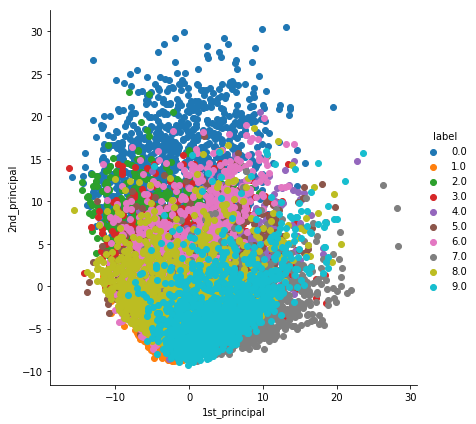

In [13]:
#plotting the data-frame with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA using Scikit-Learn

In [14]:
from sklearn import decomposition
pca = decomposition.PCA()

In [15]:
#configuring the parameters
#the number of principal components required = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d projections of sample data
print('shape of pca_reduced data : ', pca_data.shape)

shape of pca_reduced data :  (15000, 2)


/home/monodeepdas112/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


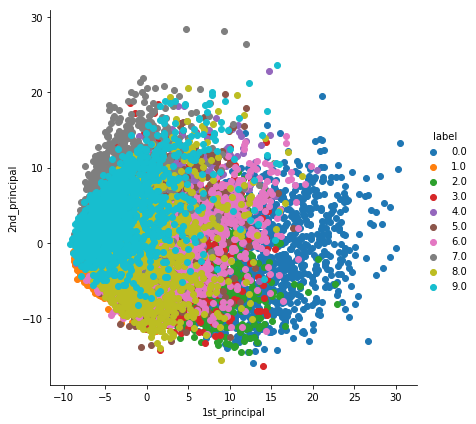

In [16]:
pca_data = np.vstack((pca_data.T, labels)).T

#creating a new dataframe for visualization
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA for dimensionality reduction (not for visualization)

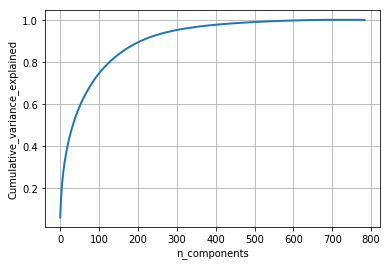

In [17]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained= pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

#plot the PCA spectrum
plt.figure(1, figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_variance_explained')
plt.show()

## t-SNE using Scikit-Learn

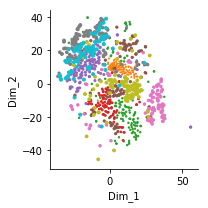

In [25]:
from sklearn.manifold import TSNE

#Picking up the top 1000 points from the dataset for this speciic demo
data_1000 = standardized_data[0:1000, :]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)

#creating a new dataframe which help in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1','Dim_2','label'))

#plotting the results
sns.FacetGrid(tsne_df, hue='label', height=3).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
plt.show()